In [2]:
%reload_kedro
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

[12/16/23 02:36:49] INFO     Resolved project path as:                                              ]8;id=499150;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=433795;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/joelmashana/IRP/joel-mashana-dissertation-project.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/16/23 02:36:50] INFO     Kedro project Joel Mashana Dissertation Project                        ]8;id=451624;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=789375;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=374800;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=51459;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=379310;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=398935;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [4]:
df = catalog.load('buyer_payment_practice_dataset_mean_imputed')

[12/16/23 02:38:46] INFO     Loading data from 'buyer_payment_practice_dataset_mean_imputed'    ]8;id=131277;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=813244;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (CSVDataSet)...                                                                       

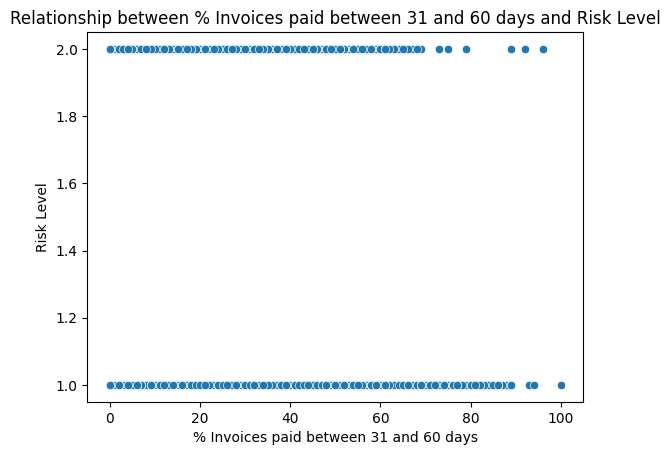

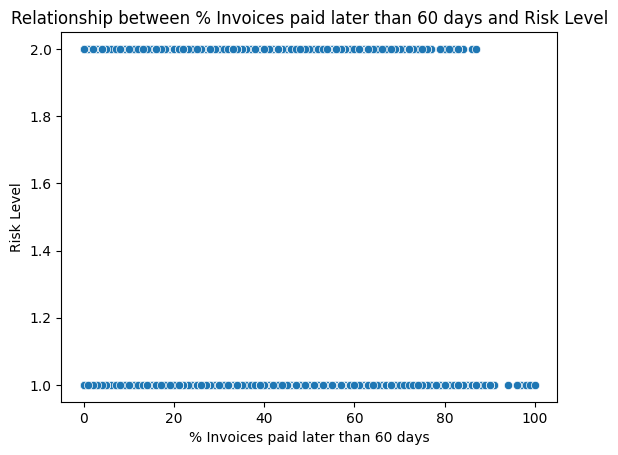

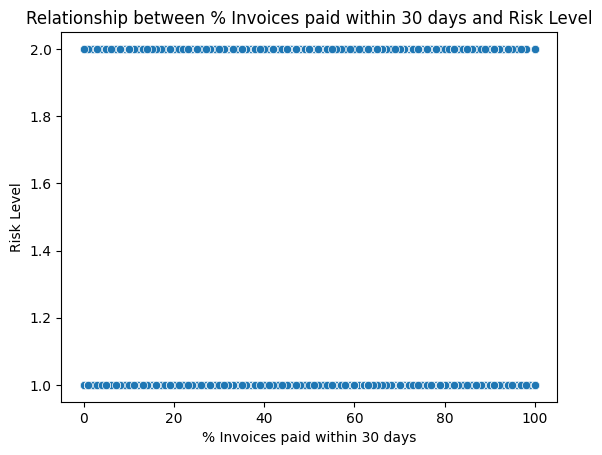

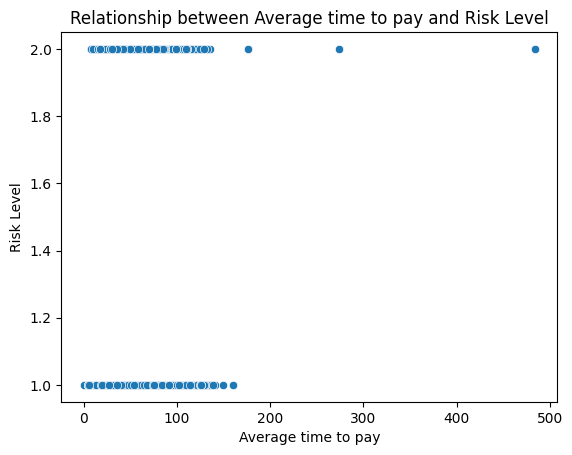

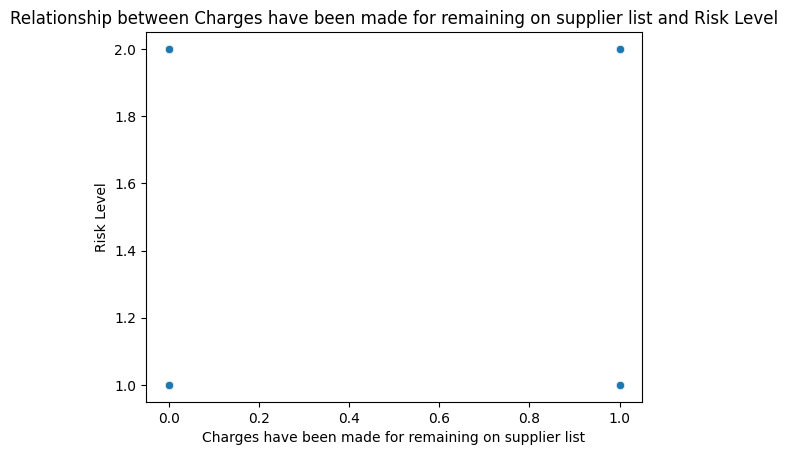

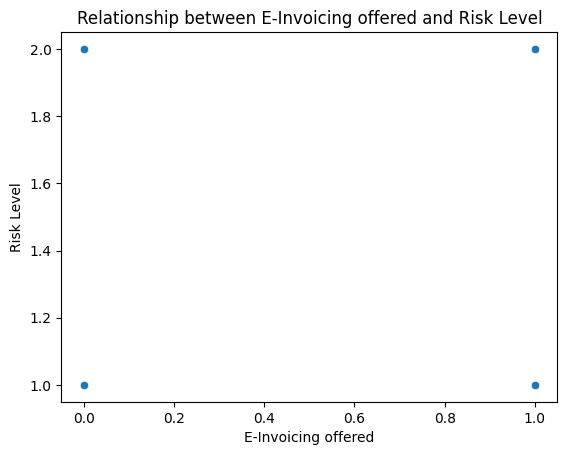

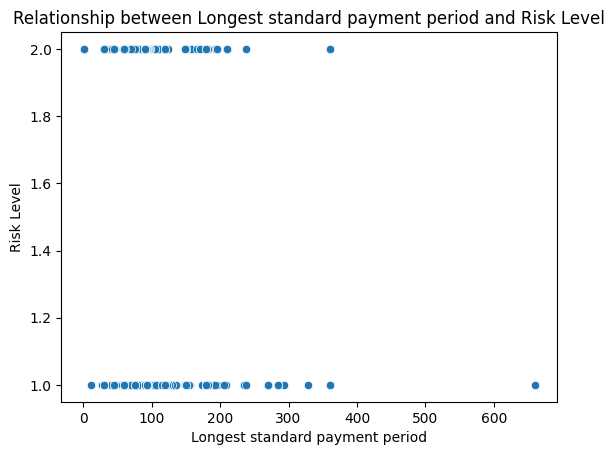

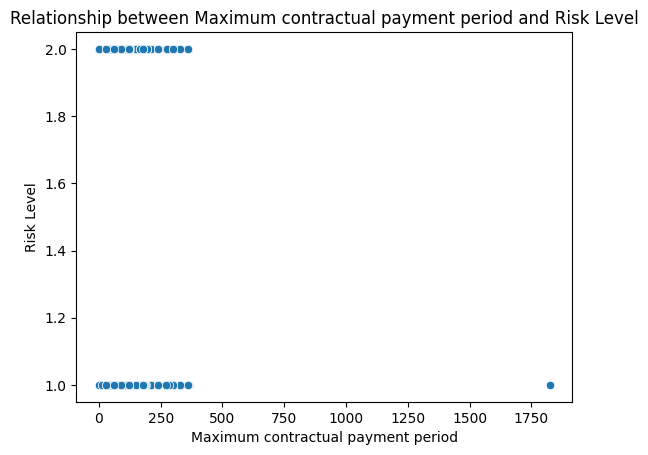

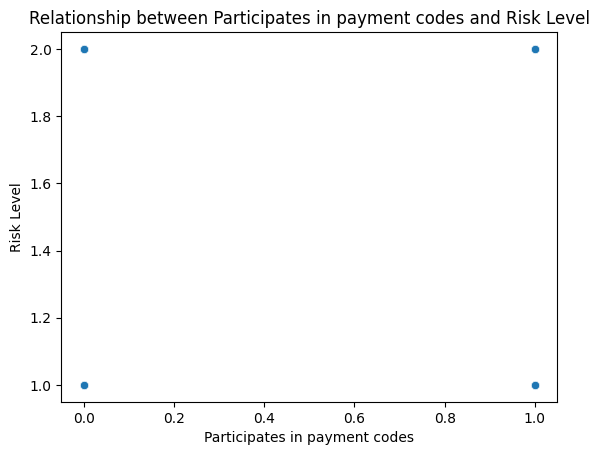

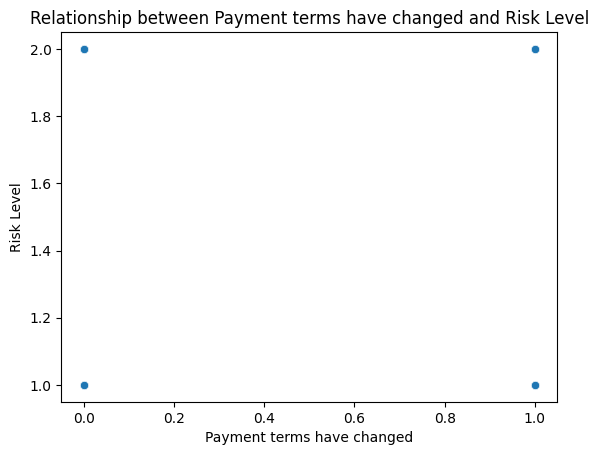

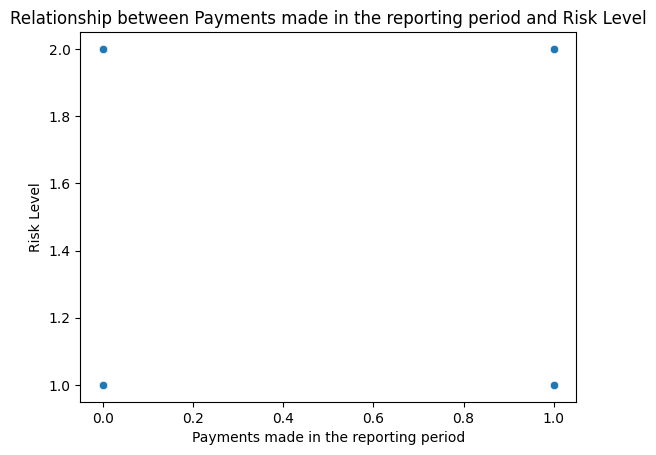

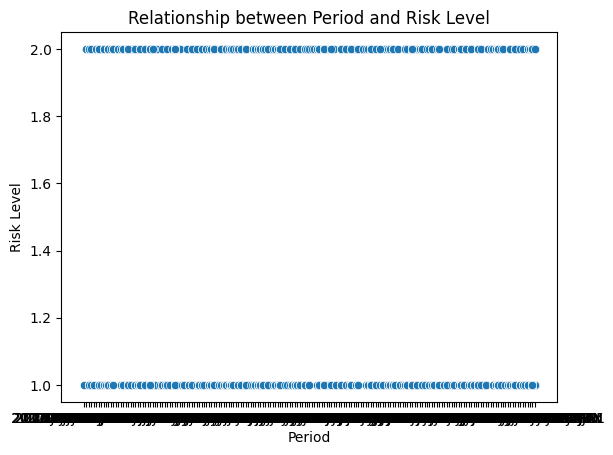

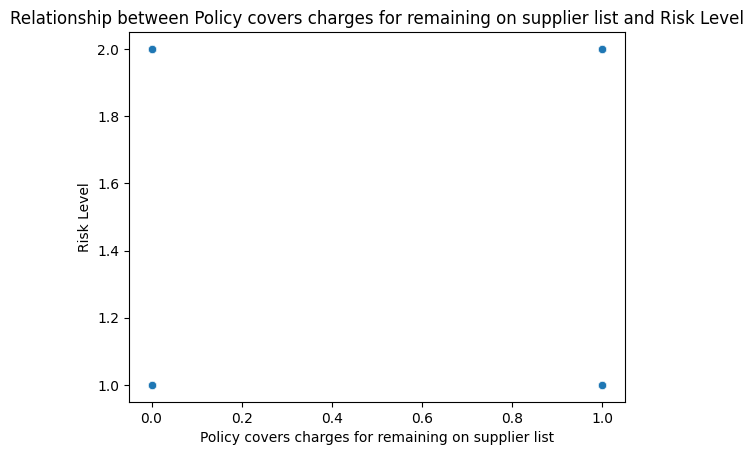

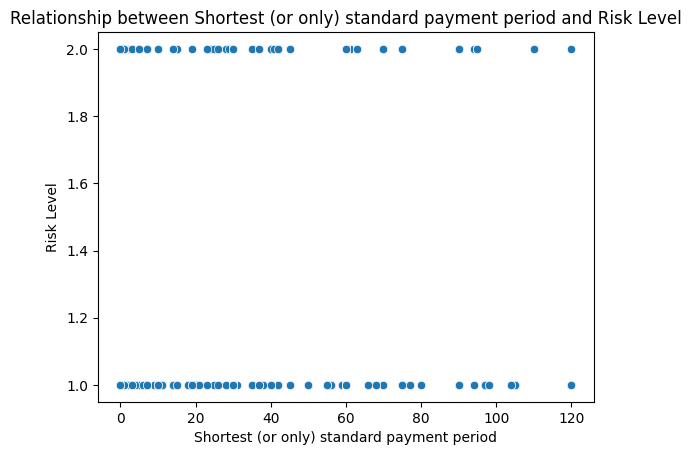

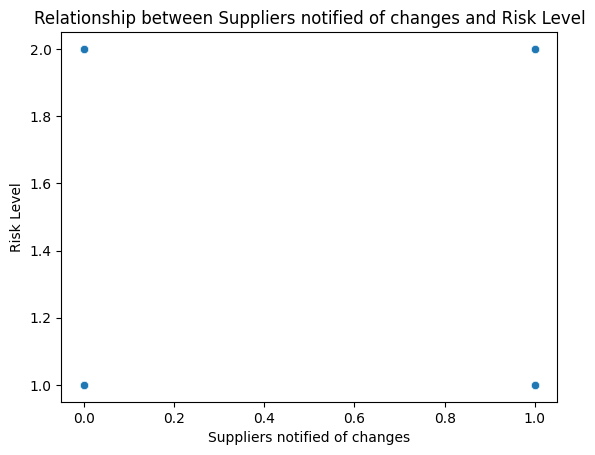

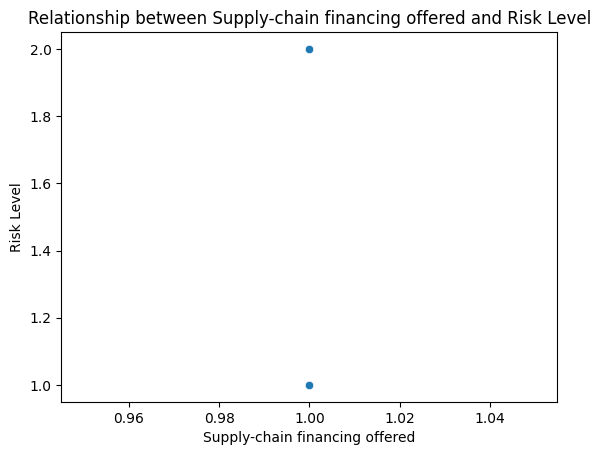

In [6]:


# Assuming your dependent variable is named 'target' and the rest are independent variables
dependent_var = 'Risk Level'
independent_vars = df.columns.difference([dependent_var])

# Check for linearity with log odds
# Logistic regression requires a linear relationship between independent variables and log odds
for ivar in independent_vars:
    sns.scatterplot(x=df[ivar], y=df[dependent_var])
    plt.title(f"Relationship between {ivar} and {dependent_var}")
    plt.show()


In [7]:

# Check for multicollinearity using Variance Inflation Factor (VIF)
# VIF starts at 1 and has no upper limit. VIF > 10 indicates high multicollinearity.
X = df[independent_vars]
X['intercept'] = 1  # Adding constant for VIF calculation
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 X['intercept'] = 1  # Adding constant for VIF calculation                                   │
│    5 vif_data = pd.DataFrame()                                                                   │
│    6 vif_data['feature'] = X.columns                                                             │
│ ❱  7 vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))    │
│    8 print(vif_data)                                                                             │
│    9                                                                                             │
│   10                                                                                             │
│                                                                                                  │
│ in <listcomp>:7                                                                                  │
│                                                                                                  │
│    4 X['intercept'] = 1  # Adding constant for VIF calculation                                   │
│    5 vif_data = pd.DataFrame()                                                                   │
│    6 vif_data['feature'] = X.columns                                                             │
│ ❱  7 vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))    │
│    8 print(vif_data)                                                                             │
│    9                                                                                             │
│   10                                                                                             │
│                                                                                                  │
│ /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/statsm │
│ odels/stats/outliers_influence.py:197 in variance_inflation_factor                               │
│                                                                                                  │
│    194 │   x_i = exog[:, exog_idx]                                                               │
│    195 │   mask = np.arange(k_vars) != exog_idx                                                  │
│    196 │   x_noti = exog[:, mask]                                                                │
│ ❱  197 │   r_squared_i = OLS(x_i, x_noti).fit().rsquared                                         │
│    198 │   vif = 1. / (1. - r_squared_i)                                                         │
│    199 │   return vif                                                                            │
│    200                                                                                           │
│                                                                                                  │
│ /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/statsm │
│ odels/regression/linear_model.py:922 in __init__                                                 │
│                                                                                                  │
│    919 │   │   │   msg = ("Weights are not supported in OLS and will be ignored"                 │
│    920 │   │   │   │      "An exception will be raised in the next version.")                    │
│    921 │   │   │   warnings.warn(msg, ValueWarning)                                              │
│ ❱  922 │   │   super(OLS, self).__init__(endog, exog, missing=missing,                           │
│    923 │   │   │   │   │   │   │   │     hasconst=hasconst,

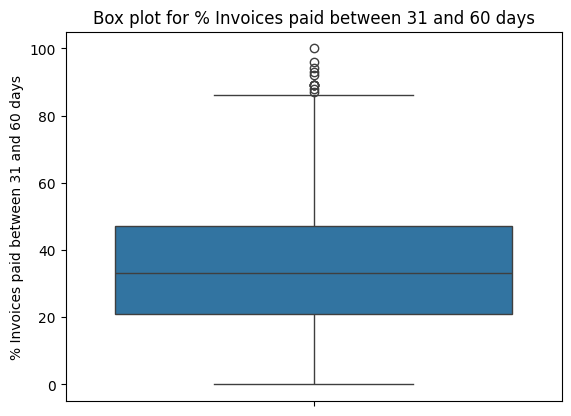

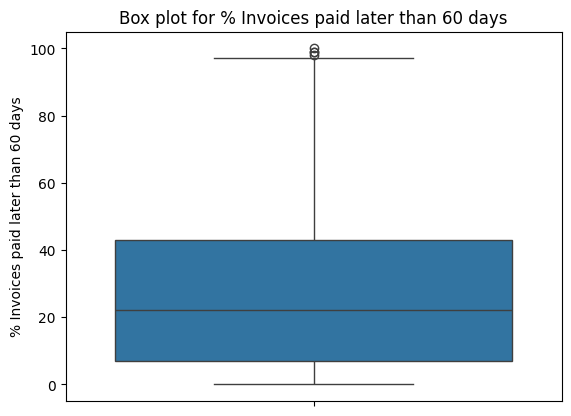

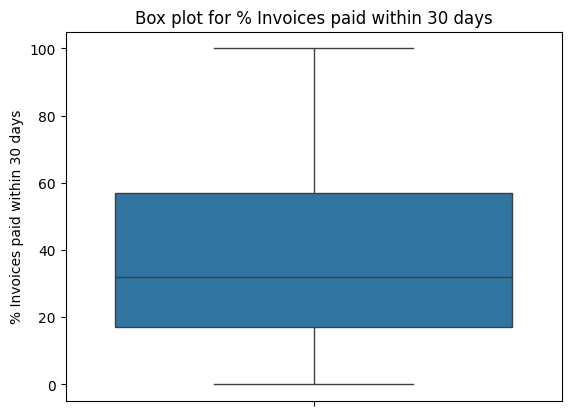

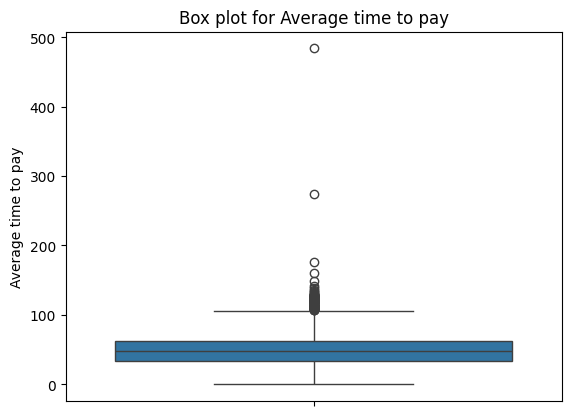

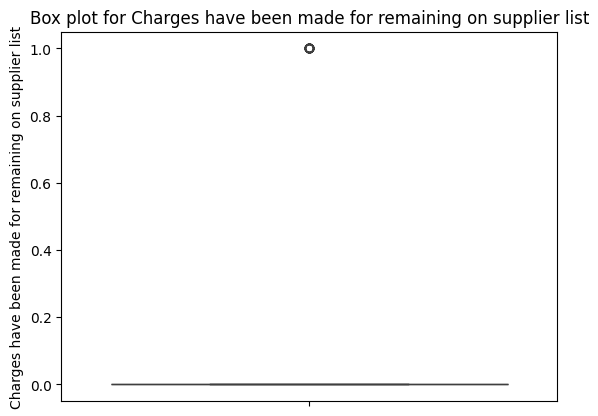

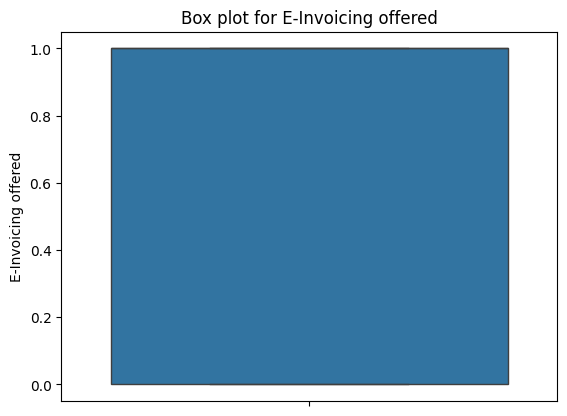

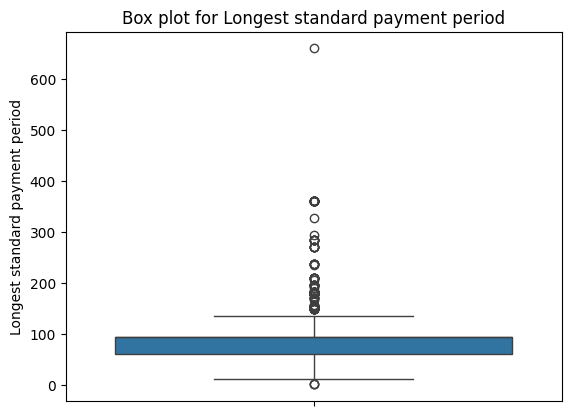

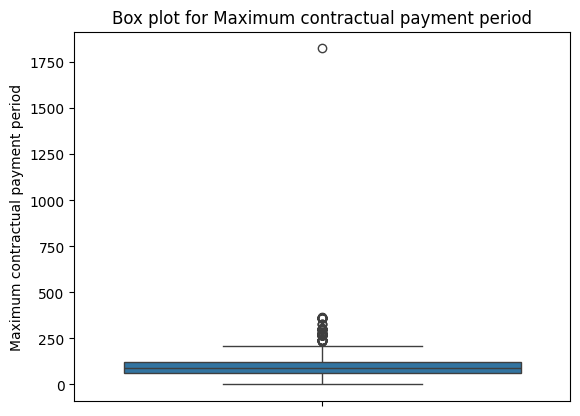

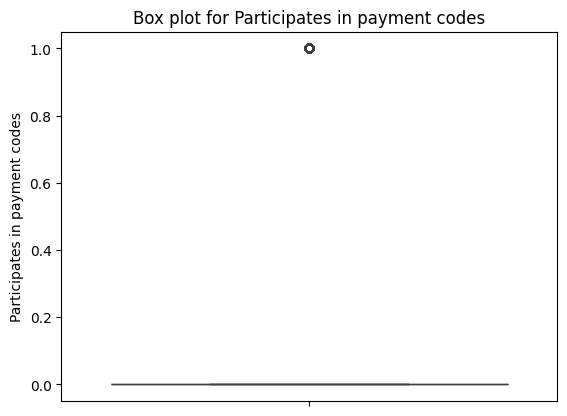

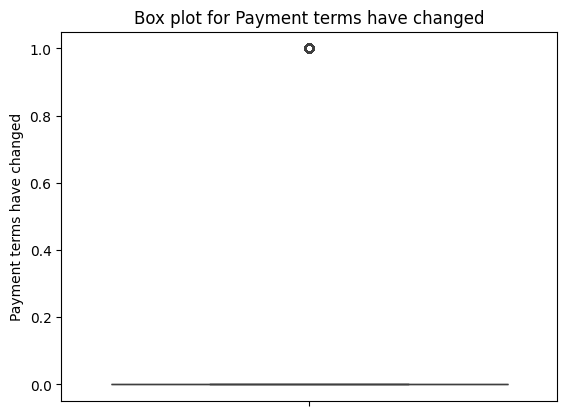

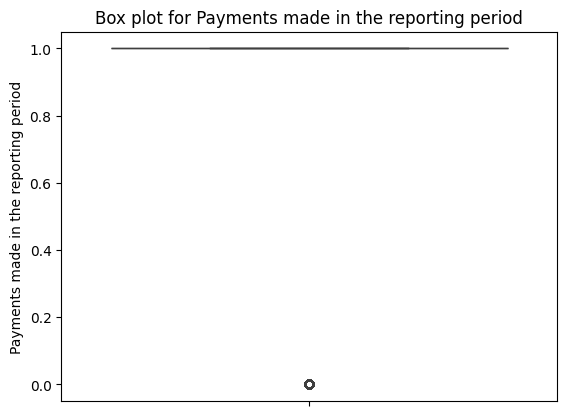

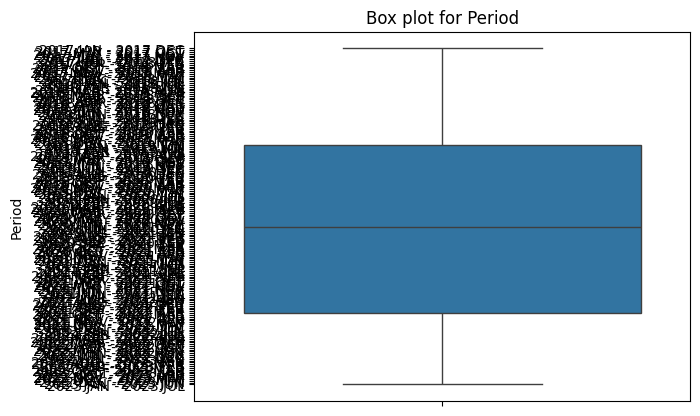

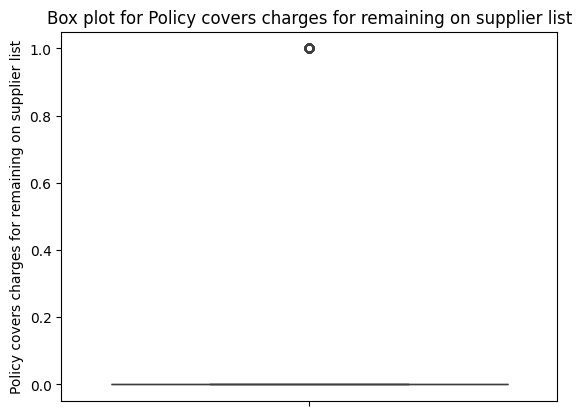

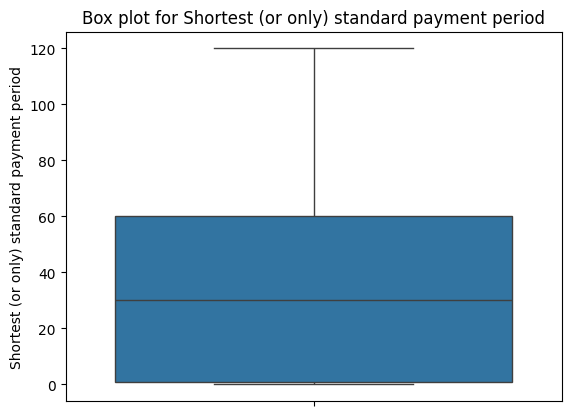

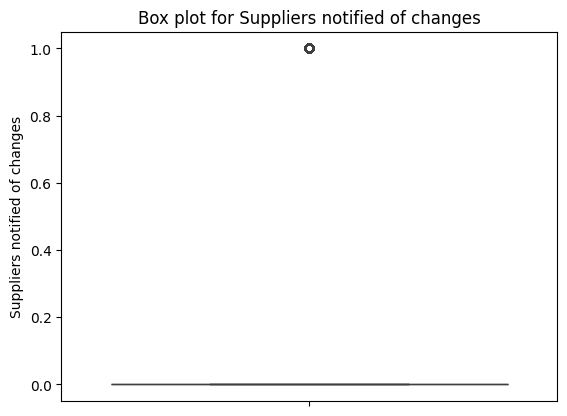

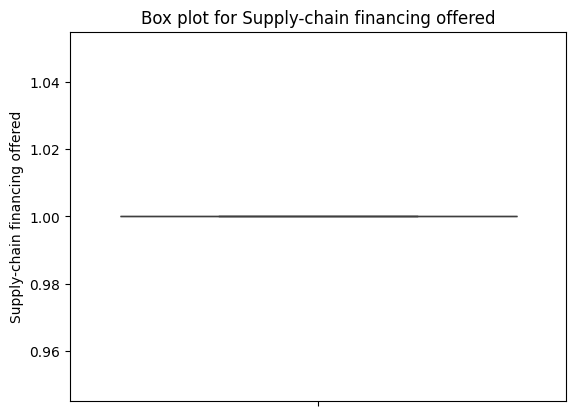

In [8]:
# Check for outliers
# Box plots for each independent variable to check for outliers
for ivar in independent_vars:
    sns.boxplot(y=df[ivar])
    plt.title(f"Box plot for {ivar}")
    plt.show()
